In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("kidney_disease - kidney_disease.csv")

In [4]:
df.shape

(400, 26)

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
rename_map = {
    'id':'id',
    'age':'age',
    'bp': 'blood_pressure',
    'sg': 'urine_specific_gravity',
    'al': 'albumin_in_urine',
    'su': 'sugar_in_urine',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cells',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria_presence',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'kidney_disease_class'
}

df = df.rename(columns=rename_map)


In [8]:
df.describe()

,id,age,blood_pressure,urine_specific_gravity,albumin_in_urine,sugar_in_urine,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.describe(include="object")


,red_blood_cells,pus_cells,pus_cell_clumps,bacteria_presence,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,kidney_disease_class
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,43,90,46,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,52,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,261,364,317,323,339,250


In [10]:
df['packed_cell_volume'] = df['packed_cell_volume'].replace('?', np.nan)
df['white_blood_cell_count'] = df['white_blood_cell_count'].replace('?', np.nan)
df['red_blood_cell_count'] = df['red_blood_cell_count'].replace('?', np.nan)
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')


In [11]:
df.describe(include="object")

,red_blood_cells,pus_cells,pus_cell_clumps,bacteria_presence,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,kidney_disease_class
count,248,335,396,396,398,398,398,399,399,399,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,354,374,251,261,364,317,323,339,250


In [12]:
df.drop(['id','red_blood_cells','pus_cells','pus_cell_clumps','bacteria_presence',
    'hypertension','diabetes_mellitus','coronary_artery_disease',
    'appetite','pedal_edema','anemia','sugar_in_urine'],axis=1,inplace=True)

In [13]:
df['kidney_disease_class']=df['kidney_disease_class'].map({'ckd':1, 'notckd':0})

In [14]:
df.corr()['kidney_disease_class'].sort_values(ascending=False)

kidney_disease_class      1.000000
albumin_in_urine          0.627090
blood_glucose_random      0.419672
blood_urea                0.380605
serum_creatinine          0.299969
blood_pressure            0.294077
white_blood_cell_count    0.231919
age                       0.227268
potassium                 0.084541
sodium                   -0.375674
red_blood_cell_count     -0.699089
urine_specific_gravity   -0.732163
packed_cell_volume       -0.741427
hemoglobin               -0.768919
Name: kidney_disease_class, dtype: float64

In [15]:
df.isnull().sum()

age                         9
blood_pressure             12
urine_specific_gravity     47
albumin_in_urine           46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
kidney_disease_class        0
dtype: int64

In [17]:
features = df.columns[df.columns != 'kidney_disease_class']
df[features] = df[features].fillna(df[features].median())

In [18]:
df.head()

,age,blood_pressure,urine_specific_gravity,albumin_in_urine,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,kidney_disease_class
0,48.0,80.0,1.020,1.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1
1,7.0,50.0,1.020,4.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,1
2,62.0,80.0,1.010,2.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1
3,48.0,70.0,1.005,4.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1
4,51.0,80.0,1.010,2.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1


In [19]:
df['age'] = df['age'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     400 non-null    int64  
 1   blood_pressure          400 non-null    float64
 2   urine_specific_gravity  400 non-null    float64
 3   albumin_in_urine        400 non-null    float64
 4   blood_glucose_random    400 non-null    float64
 5   blood_urea              400 non-null    float64
 6   serum_creatinine        400 non-null    float64
 7   sodium                  400 non-null    float64
 8   potassium               400 non-null    float64
 9   hemoglobin              400 non-null    float64
 10  packed_cell_volume      400 non-null    float64
 11  white_blood_cell_count  400 non-null    float64
 12  red_blood_cell_count    400 non-null    float64
 13  kidney_disease_class    400 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 43.

In [21]:
df['kidney_disease_class'].value_counts()

kidney_disease_class
1    250
0    150
Name: count, dtype: int64

In [22]:
x = df.drop('kidney_disease_class', axis=1)  # all columns except target
y = df['kidney_disease_class']               # tar

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#smt = SMOTE(random_state=42)
#x_train_bal, y_train_bal = smt.fit_resample(x_train, y_train)
#print("Before:",y_train.value_counts())
#print("After:",y_train_bal.value_counts())

In [ ]:
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#x_train_bal= scaler.fit_transform(x_train_bal)
#x_test = scaler.transform(x_test)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [25]:
lr = LogisticRegression(random_state=42,class_weight='balanced',max_iter=200)
lr.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)

In [26]:
y_pred = lr.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8625
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.91      0.86      0.89        50

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80

[[26  4]
 [ 7 43]]


In [27]:
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split= 2,
    max_depth=5,
    class_weight='balanced_subsample',
    min_samples_leaf= 4,
    bootstrap=True,
    max_features='sqrt',
    random_state=42


)
rf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       min_samples_leaf=4, random_state=42)

In [28]:
y_pred = rf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[30  0]
 [ 0 50]]


In [29]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(rf, x, y, cv=5, scoring='accuracy')
print(score, score.mean())


[0.975  1.     0.9625 0.9875 1.    ] 0.985


In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators= 300,learning_rate= 0.05,
        max_depth= 4,
        min_child_weight= 3,
        gamma= 0.1,
        subsample= 0.8,
        colsample_bytree= 0.8,
        reg_alpha= 0.2,
        reg_lambda=1.0,
        scale_pos_weight= 1,   
        objective= "binary:logistic",
         eval_metric= "logloss"
)


xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
y_pred = rf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[30  0]
 [ 0 50]]


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, x, y, cv=5, scoring='accuracy')
print(scores, scores.mean())


[0.975  0.9875 0.9375 0.9875 1.    ] 0.9775


In [33]:
from sklearn.metrics import roc_curve , roc_auc_score
y_prob = rf.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])

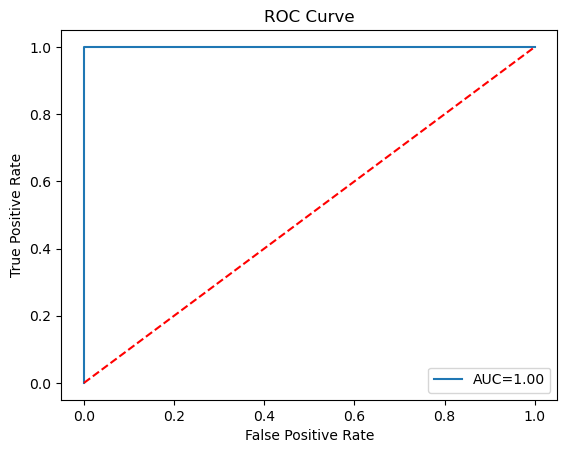

In [34]:
#AUC and ROC
plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
joblib.dump(rf, "kidney_final_model.pkl")

['kidney_final_model.pkl']